## EMPLOYEE PREDICTION

Description:The Employee Future Prediction project aims to predict the likelihood of an employee 
leaving a company based on various factors such as age, experience, gender, education, 
city, and payment tier. By analyzing these factors, the project aims to provide insights 
that can help organizations take proactive measures to retain valuable employees and 
reduce turnover

## all needed libraries to be run related to classifier problems

In [5]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder


In [8]:
!pip install lightgbm


  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/87/0f/7630ee4fea60ebab5b0e3c35df570cb295c91ece537231a38105c0f243e8/lightgbm-4.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.3 MB 3.5 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.3 MB 2.1 MB/s eta 0:00:01
   --------------------- ------------------ 0.7/1.3 MB 4.0 MB/s eta 0:00:01
   --------------------------- ------------ 0.9/1.3 MB 4.1 MB/s eta 0:00:01
   ---------------------------------- ----- 1.1/1.3 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
from lightgbm import LGBMClassifier

In [11]:
## import file

data = pd.read_csv("Employee.csv")

In [12]:
data.shape

(4653, 9)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [16]:
data.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [20]:
duplicates= data.duplicated().sum()
duplicates

1889

In [21]:
data1 = data.drop_duplicates()

In [23]:
data1.shape

(2764, 9)

In [25]:
data1.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [26]:
data1.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000
mean,2015.090449,2.636035,30.952967,2.644356,0.393632
std,1.885943,0.624001,5.108872,1.610610,0.488643
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,2.000000,27.000000,1.000000,0.000000
50%,2015.000000,3.000000,30.000000,2.000000,0.000000
75%,2017.000000,3.000000,35.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


<Axes: >

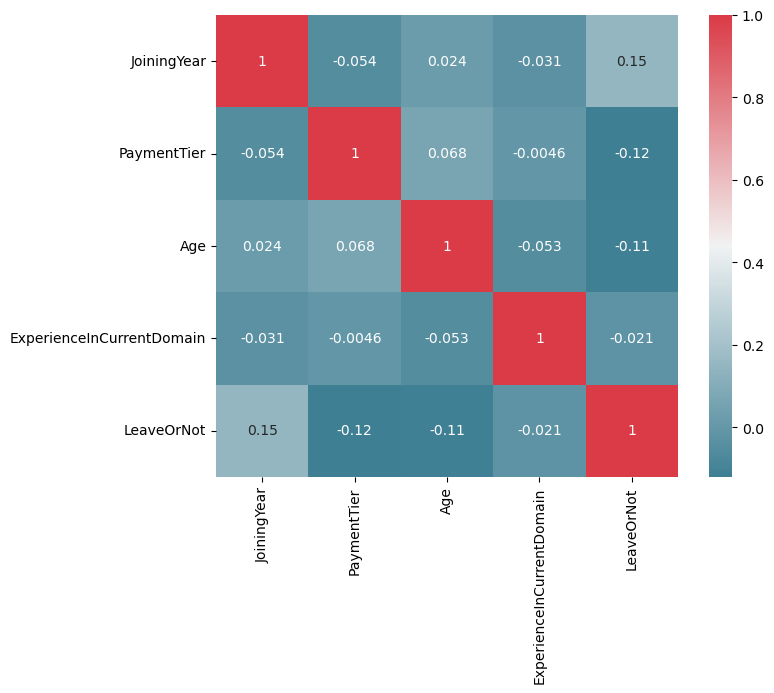

In [33]:
## check corelation between the variables
f, ax = plt.subplots(figsize=(8, 6))
corr = data1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax ,annot=True)

## PaymentTier' & 'Age' have a very weak negative correlation with Our Target variable ('LeaveOrNot')
## 'JoiningYear' has a very weak positive correlation with Target variable ('LeaveOrNot')

C:\Users\91772\AppData\Local\Temp\ipykernel_10040\3290513524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['JoiningYear'] = data1['JoiningYear'].astype('object')


<Axes: xlabel='JoiningYear', ylabel='count'>

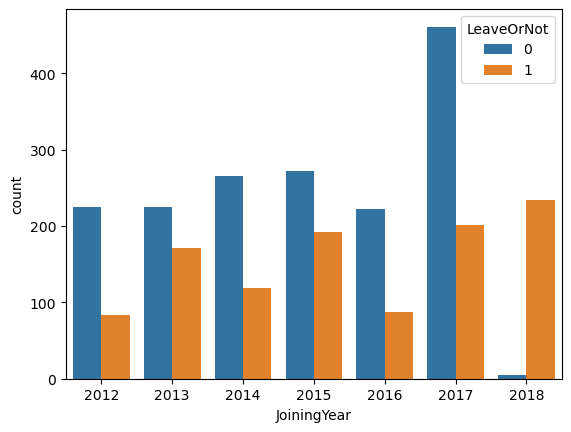

In [35]:
## by this we can know that how many employees not leaved and leaved as per the years
data1['JoiningYear'] = data1['JoiningYear'].astype('object')
sns.countplot(data = data1 ,x='JoiningYear',hue='LeaveOrNot')

# in 2018 majority of employess leaved the company

<Axes: xlabel='EverBenched', ylabel='count'>

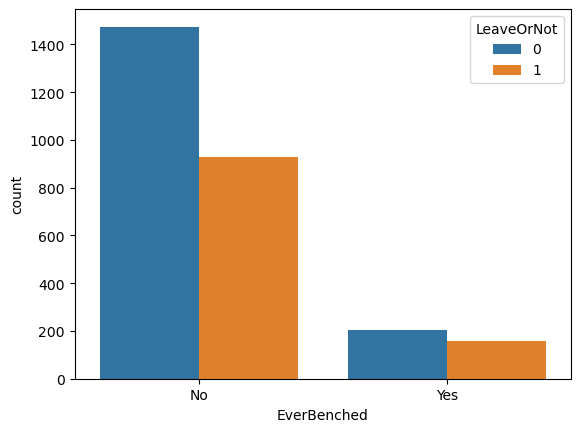

In [37]:
sns.countplot(data = data1 ,x='EverBenched',hue='LeaveOrNot')

## in this graph we seen that most of employees who are benched they didnt leave the company

<Axes: xlabel='ExperienceInCurrentDomain', ylabel='count'>

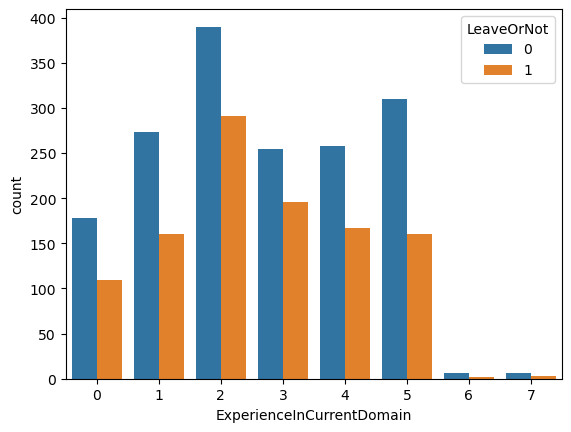

In [40]:
sns.countplot(data = data1 ,x='ExperienceInCurrentDomain',hue='LeaveOrNot')

from this grap we can know that employee not leaving or staying in company because of experience

<Axes: xlabel='Gender', ylabel='count'>

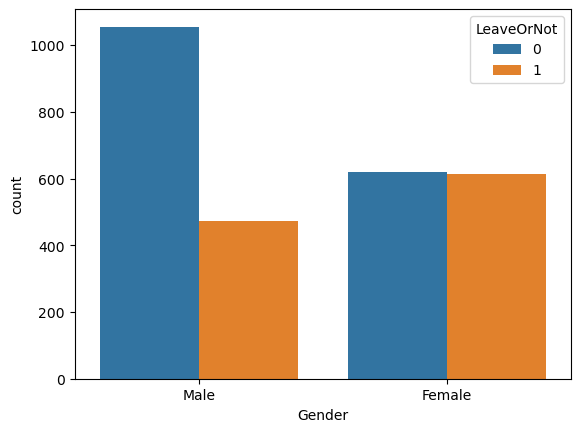

In [42]:
sns.countplot(data = data1 ,x='Gender',hue='LeaveOrNot')

In [44]:
## almost equal laving and staying of employees are female , most of mens are not leaving the company

C:\Users\91772\AppData\Local\Temp\ipykernel_10040\1308909575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['PaymentTier'] = data1['PaymentTier'].astype('category')


<Axes: xlabel='PaymentTier', ylabel='count'>

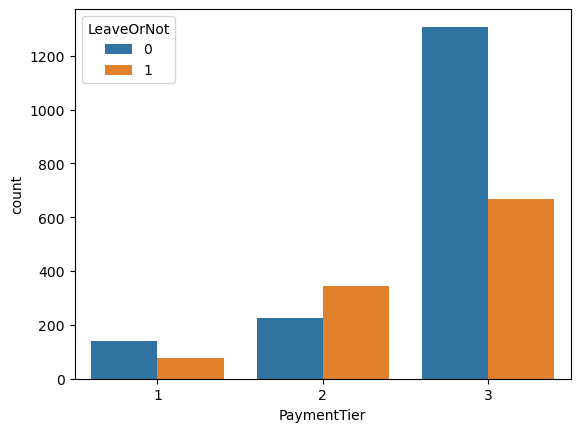

In [46]:
data1['PaymentTier'] = data1['PaymentTier'].astype('category')
sns.countplot(data = data1 ,x='PaymentTier',hue='LeaveOrNot')

## in this half of the emoployees having payment tier 3  are staying  and leaving 

## paytier 2 has high leaving of employees from company

<Axes: xlabel='City', ylabel='count'>

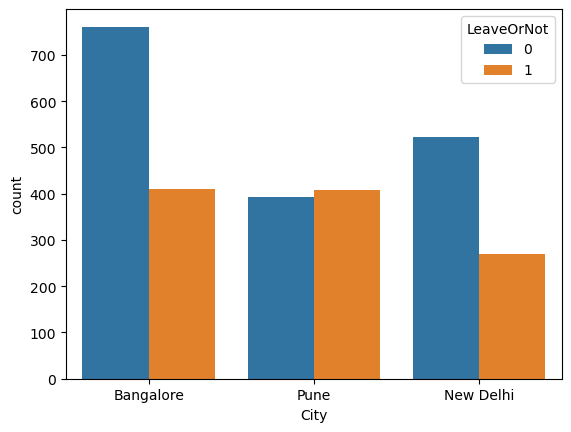

In [50]:
sns.countplot(data = data1 ,x='City',hue='LeaveOrNot')

## major bamgalore and delhi employees not leaving much 

<Axes: xlabel='Education', ylabel='count'>

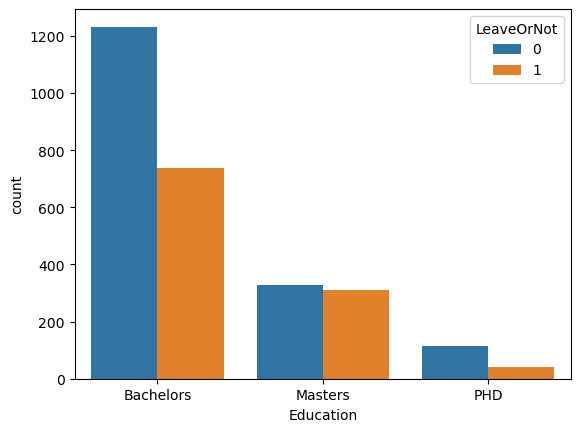

In [52]:
sns.countplot(data = data1 ,x='Education',hue='LeaveOrNot')

## most of the employees arebachelors leaving the company

C:\Users\91772\AppData\Local\Temp\ipykernel_10040\1427453235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['AgeGroup'] = pd.qcut(data1['Age'], q=3, labels=groups)


<Axes: xlabel='AgeGroup', ylabel='count'>

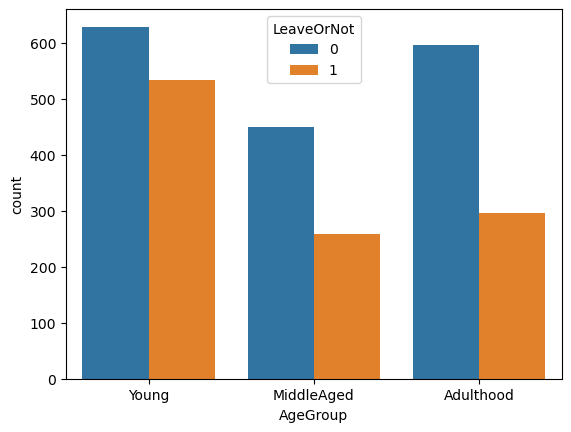

In [55]:
groups = ['Young', 'MiddleAged', 'Adulthood']
data1['AgeGroup'] = pd.qcut(data1['Age'], q=3, labels=groups)
sns.countplot(data = data1 ,x='AgeGroup',hue='LeaveOrNot')

# most of young employees are leaving the comapany`

## Feature Engineering

In [72]:
data2 = pd.get_dummies(data1, columns = ['AgeGroup','EverBenched','City','JoiningYear','Education','Gender'])



C:\Users\91772\anconda\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [73]:
data2.head()

,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,AgeGroup_Young,AgeGroup_MiddleAged,AgeGroup_Adulthood,EverBenched_No,EverBenched_Yes,City_Bangalore,...,JoiningYear_2014,JoiningYear_2015,JoiningYear_2016,JoiningYear_2017,JoiningYear_2018,Education_Bachelors,Education_Masters,Education_PHD,Gender_Female,Gender_Male
0,3,34,0,0,0,0,1,1,0,1,...,0,0,0,1,0,1,0,0,0,1
1,1,28,3,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,3,38,2,0,0,0,1,1,0,0,...,1,0,0,0,0,1,0,0,1,0
3,3,27,5,1,1,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,1
4,3,24,2,1,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1


In [76]:
X = data2.drop('LeaveOrNot',axis=1)
y= data2.LeaveOrNot.values

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2211, 23) (553, 23) (2211,) (553,)


In [96]:
X_test =np.ascontiguousarray(X_test)
X_train=np.ascontiguousarray(X_train)
y_train=np.ascontiguousarray(y_train)
y_test=np.ascontiguousarray(y_test)

In [97]:
knc = KNeighborsClassifier()

knc.fit(X_train,y_train)



KNeighborsClassifier()

In [98]:
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=7,random_state=2)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=17, random_state=2,max_depth=5)
abc = AdaBoostClassifier(n_estimators=17, random_state=2,learning_rate=0.2)
bc = BaggingClassifier(n_estimators=17, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=18,random_state=2)
xgb = XGBClassifier(n_estimators=17,random_state=2,use_label_encoder=False,eval_metric='mlogloss')
lgbm= LGBMClassifier(verbose=-1,
                          learning_rate=0.1,
                          max_depth=6,
                          num_leaves=10, 
                          n_estimators=17,
                          max_bin=500,random_state=2)


clfs = {
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb,
    'lgbm':lgbm
}

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,zero_division=0)
    
    return accuracy,precision

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
#     print("For ",name)
#     print("Accuracy - ",current_accuracy)
#     print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df


C:\Users\91772\anconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


,Algorithm,Accuracy,Precision
10,lgbm,0.831826,0.926667
2,DT,0.828210,0.893750
5,AdaBoost,0.755877,0.890909
9,xgb,0.826401,0.878788
8,GBDT,0.755877,0.864407
4,RF,0.801085,0.858065
3,LR,0.770344,0.797468
1,NB,0.755877,0.786667
6,BgC,0.726944,0.666667
7,ETC,0.712477,0.642202
